In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
# Download cleaned file
url = 'https://drive.usercontent.google.com/download?id=1x7_mo2EJAsqNaPKw87xHdQFFADBXHdcy&export=download&authuser=0&confirm=t'
df = pd.read_csv(url, on_bad_lines='skip')

In [87]:
# Balance the dataset to be 50/50 for status 0 and 1
status_1_sample = df[df['status']==1].sample(20000)
status_0_sample = df[df['status']==0].sample(20000)

full = pd.concat([status_0_sample, status_1_sample])
full

,crimeTheft,crimeViolence,crimeSexual,crimeDamage,crimeChild,crimeFraud,crimeWeapon,crimeViolation,crimeKidnap,weaponHuman,weaponGun,weaponMachine,weaponNone,weaponVerbal,weaponChemical,sitePublicArea,siteStoreRestaurant,sitePublicTransport,sitePrivateTransport,sitePrivateHome,siteAthletic,siteSchoolHospital,sitePrivateProperty,siteOnline,reportDelay,reportTimely,lat,lon,crimeCountTotal,crimeCountSixMonths,crimeDensity,crimeDensitySixMonths,status,tractIncomeCategory,crimeDensityCategory,victimSex_f,victimSex_m,victimSex_x,victimDescentCategory_asian,victimDescentCategory_black,victimDescentCategory_hispanic,victimDescentCategory_native,victimDescentCategory_other,victimDescentCategory_pacific islander,victimDescentCategory_unknown,victimDescentCategory_white,victimAge_adult,victimAge_minor,victimAge_senior,victimAge_unknown
262765,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-1,1,34.2208,-118.5317,1754,65,232.214925,8.605456,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
714013,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,1,34.2034,-118.5852,1790,54,217.526528,6.562253,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
226877,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,1,34.2305,-118.5645,4578,140,244.312111,7.471318,0,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2972643,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,-1,1,33.7639,-118.2934,3243,160,146.911095,7.248158,0,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1011233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,1,34.1159,-118.2171,1044,18,114.828040,1.979794,0,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,0,34.2084,-118.4235,6141,184,174.819004,5.238023,1,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2414396,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,33.9637,-118.2871,6728,172,1342.144099,34.311651,1,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1040931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,34.1111,-118.2918,1977,55,286.290377,7.964578,1,3,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
456251,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,34.1869,-118.4063,2651,80,258.621102,7.804484,1,2,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [88]:
# Reduce dataframe to just these columns (open to experimentation)
reduced_cols = ['crimeTheft', 'lat', 'lon', 'crimeDensitySixMonths', 'crimeCountSixMonths', 'crimeDensity', 'reportDelay', 'crimeViolence', 'weaponHuman', 'tractIncomeCategory', 'sitePrivateHome', 'crimeDamage', 'crimeWeapon', 'sitePublicArea', 'status']
full = full[reduced_cols]
full

,crimeTheft,lat,lon,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,tractIncomeCategory,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,status
262765,0,34.2208,-118.5317,8.605456,65,232.214925,-1,1,0,1,0,0,0,0,0
714013,0,34.2034,-118.5852,6.562253,54,217.526528,-1,1,1,1,0,0,0,1,0
226877,0,34.2305,-118.5645,7.471318,140,244.312111,-1,0,0,2,1,1,0,0,0
2972643,1,33.7639,-118.2934,7.248158,160,146.911095,-1,0,1,4,0,0,0,0,0
1011233,1,34.1159,-118.2171,1.979794,18,114.828040,-1,0,0,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398005,1,34.2084,-118.4235,5.238023,184,174.819004,17,0,0,2,1,0,0,0,1
2414396,1,33.9637,-118.2871,34.311651,172,1342.144099,0,0,0,0,0,0,0,1,1
1040931,0,34.1111,-118.2918,7.964578,55,286.290377,1,0,0,3,1,0,0,0,1
456251,1,34.1869,-118.4063,7.804484,80,258.621102,0,0,0,2,0,0,0,0,1


In [89]:
# Split data into X and y (features and target variable)
X = full.drop(columns=['status'])
y = full['status']

# Split into train/test sets
# 'stratify' makes sure that the ratio of 1s to 0s is maintained in the split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [90]:
# Scale data with StandardScaler

#scale_columns = ['lat', 'lon', 'crimeCountTotal', 'crimeCountSixMonths', 'crimeDensity', 'crimeDensitySixMonths', 'reportDelay']
scale_columns = ['lat', 'lon', 'crimeCountSixMonths', 'crimeDensity', 'crimeDensitySixMonths', 'reportDelay']

scaler = StandardScaler()
scaler.fit(X_train[scale_columns])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[scale_columns] = scaler.transform(X_train[scale_columns])
X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

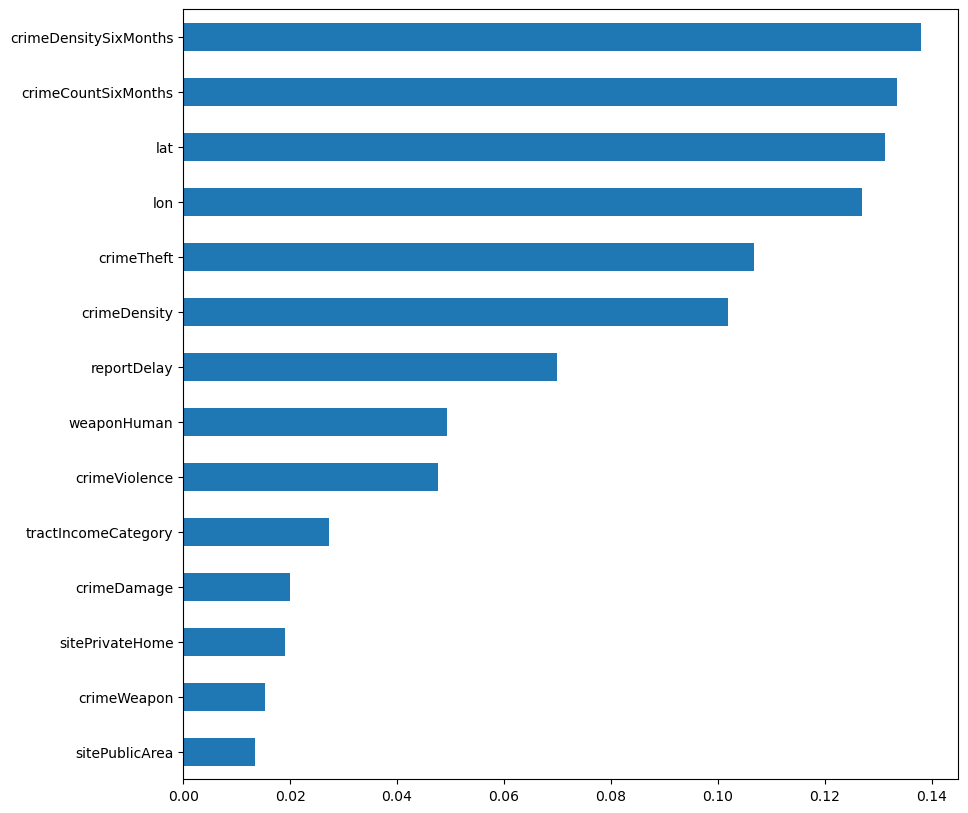

In [91]:
# See feature importance
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10))
plt.show()

In [97]:
# Try RandomForest with different criterion arguments
for criterion in ['gini', 'entropy', 'log_loss']:
    model = RandomForestClassifier(n_estimators=128, criterion=criterion)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Criterion: {criterion} - Accuracy: {accuracy_score(y_test, preds)}')

# Try RandomForest with different estimators
for estimators in [16, 32, 64, 128, 256]:
    model = RandomForestClassifier(n_estimators=estimators)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: gini - Accuracy: 0.7284
Estimators: entropy - Accuracy: 0.7274
Estimators: log_loss - Accuracy: 0.7289


In [96]:
# Try SVC with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)  # or 'rbf' for non-linear
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Kernel: {kernel} - Accuracy: {accuracy_score(y_test, preds)}')

Kernel: linear - Accuracy: 0.7343
Kernel: poly - Accuracy: 0.7416
Kernel: rbf - Accuracy: 0.7421
Kernel: sigmoid - Accuracy: 0.586


In [99]:
# Try XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.7396

In [98]:
# Try AdaBoost with different estimators
from sklearn.ensemble import AdaBoostClassifier
for estimators in [16, 32, 64, 128, 256]:
    model = AdaBoostClassifier(n_estimators=estimators, algorithm='SAMME')
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: 32 - Accuracy: 0.7419
Estimators: 64 - Accuracy: 0.742
Estimators: 128 - Accuracy: 0.7418
Estimators: 256 - Accuracy: 0.7419


In [100]:
# Try ExtraTrees with different estimators
from sklearn.ensemble import ExtraTreesClassifier
for estimators in [16, 32, 64, 128, 256]:
    model = ExtraTreesClassifier(n_estimators=estimators)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: 32 - Accuracy: 0.7118
Estimators: 64 - Accuracy: 0.7097
Estimators: 128 - Accuracy: 0.7147
Estimators: 256 - Accuracy: 0.7121


In [70]:
# Try Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, preds)}')

Accuracy: 0.7216


In [101]:
# Ensembling via democracy
# Multiple models make predictions
# All models 'vote' on predictions
# Slight improvement to accuracy

rf = RandomForestClassifier(n_estimators=128)
svc = SVC(kernel='rbf')
xgb = XGBClassifier()
ada = AdaBoostClassifier(n_estimators=128, algorithm='SAMME')
gnb = GaussianNB()


all_preds = []
for model in [rf, svc, xgb, ada, gnb]:
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    all_preds.append(preds)

summed_preds = np.sum(all_preds, axis=0)
for i in range(1,6):
    summed_preds_x = np.where(summed_preds >= i, 1, 0)
    print(i, accuracy_score(y_test, summed_preds_x))

c:\Users\Alex School\.conda\envs\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [106]:
summed_preds = np.sum(all_preds, axis=0)
for i in range(1,6):
    summed_preds_x = np.where(summed_preds >= i, 1, 0)
    print(i, accuracy_score(y_test, summed_preds_x))

1 0.711
2 0.7374
3 0.7455
4 0.7462
5 0.7326
